In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data

data = pd.read_csv('Test.csv')
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [13]:
# Data cleaning
# Handle missing values
data['Work_Experience'] = data['Work_Experience'].fillna(0)
data['Profession'] = data['Profession'].fillna('Unknown')
data['Family_Size'] = data['Family_Size'].fillna(0)

print(data.isnull().sum())

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64


In [14]:
# Convert categorical variables to numerical
label_encoders = {}
categorical_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [15]:
# Select features for clustering
features = ['Age', 'Work_Experience', 'Spending_Score', 'Family_Size']
X = data[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

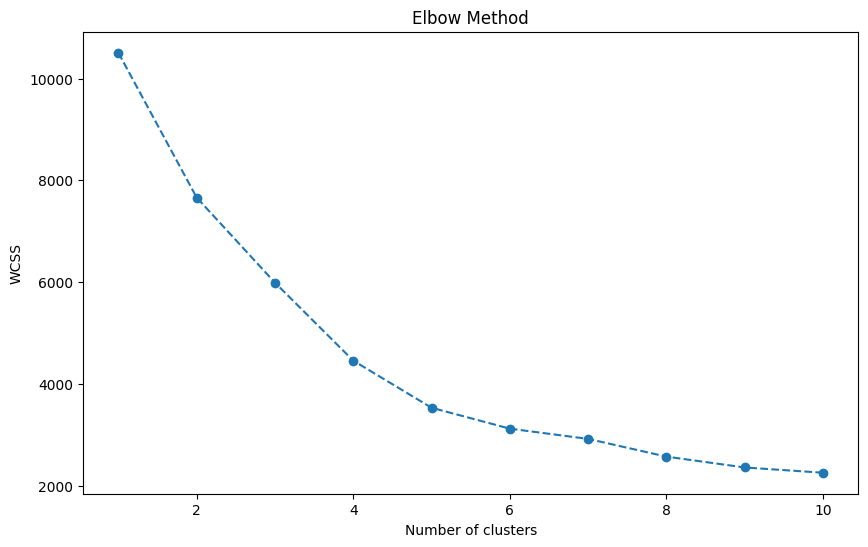

In [16]:
# ELbow method to find optimal number of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
# Based on the elbow method, let's choose 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)

# Fit the model and predict clusters
clusters = kmeans.fit_predict(X_scaled)

# Add clusters labels to the orignal data
data['Cluster'] = clusters

               Age  Work_Experience  Spending_Score  Family_Size
Cluster                                                         
0        54.198091         1.078759        0.342482     2.933174
1        48.147383         0.804408        1.975207     1.325069
2        28.877888         1.066007        1.937294     4.359736
3        36.750547         8.501094        1.582057     2.277899


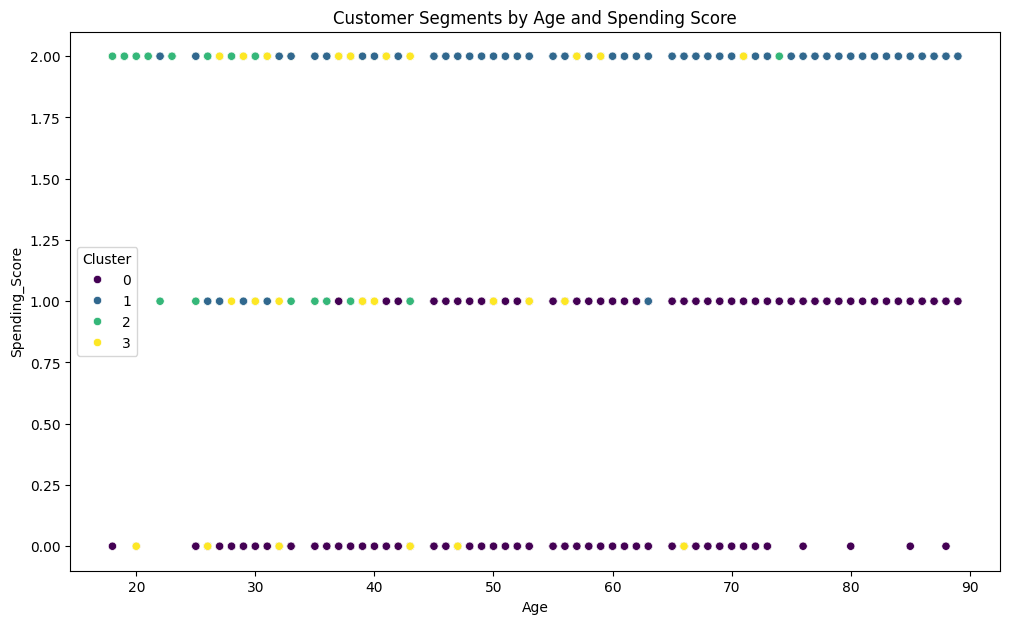

In [29]:
# Analyze cluster characteristics
cluster_profile = data.groupby('Cluster')[features].mean()
print(cluster_profile)

# Visualize
plt.figure(figsize=(12,7))
sns.scatterplot(x='Age', y='Spending_Score', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segments by Age and Spending Score')
plt.show()

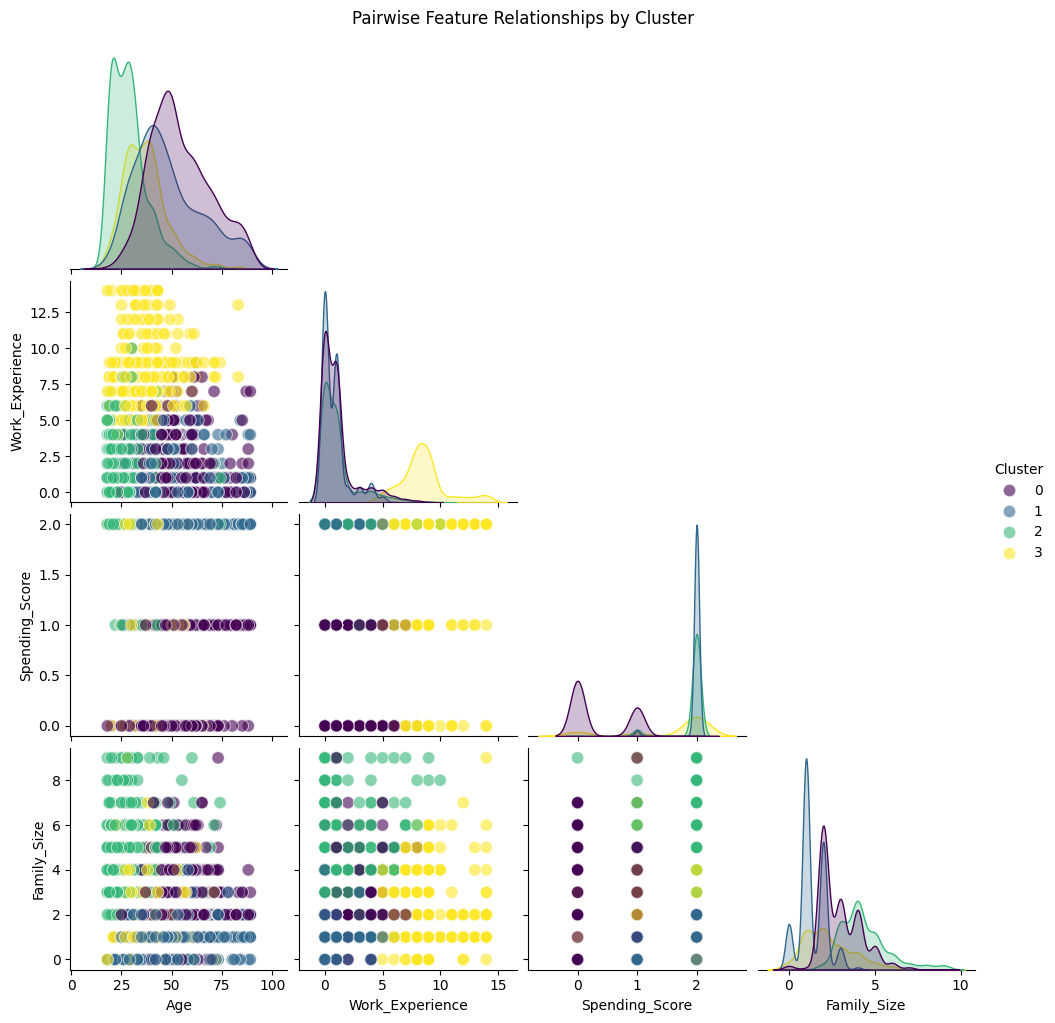

In [30]:
cluster_features = features + ['Cluster']
sns.pairplot(
    data[cluster_features], 
    hue='Cluster',
    palette='viridis',
    plot_kws={'alpha': 0.6, 's': 80},
    corner=True
)
plt.suptitle('Pairwise Feature Relationships by Cluster', y=1.02)
plt.show()

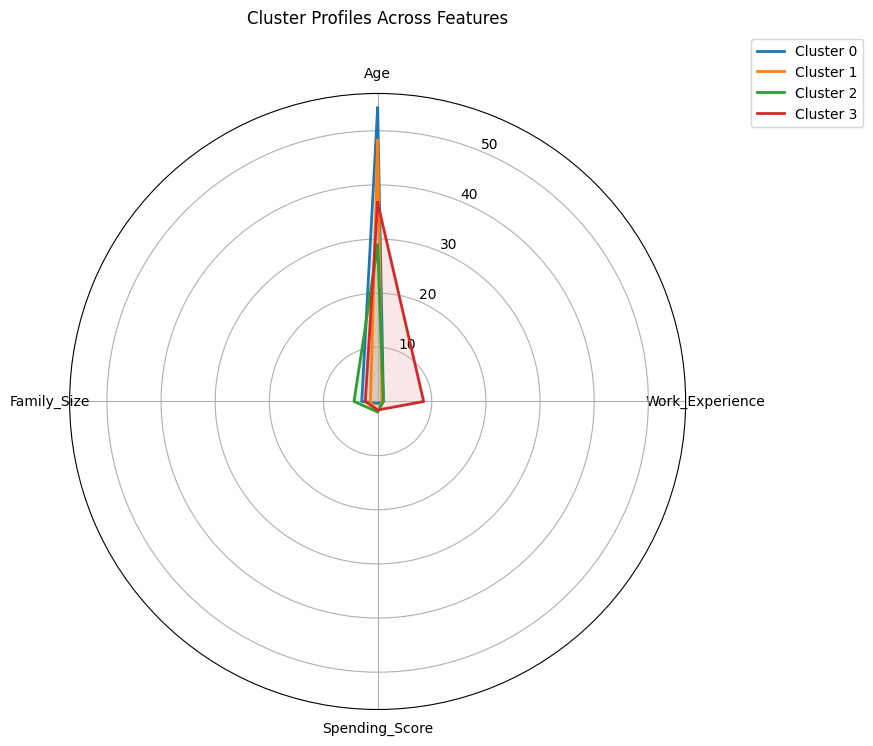

In [31]:
from math import pi

# Prepare data
categories = features
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)

for cluster in sorted(data['Cluster'].unique()):
    values = cluster_profile.loc[cluster].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {cluster}')
    ax.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], categories)
plt.title('Cluster Profiles Across Features', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

In [34]:
pip install statsmodels

  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 10.6 MB/s eta 0:00:00 0:00:01
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]
Note: you may need to restart the kernel to use updated packages.


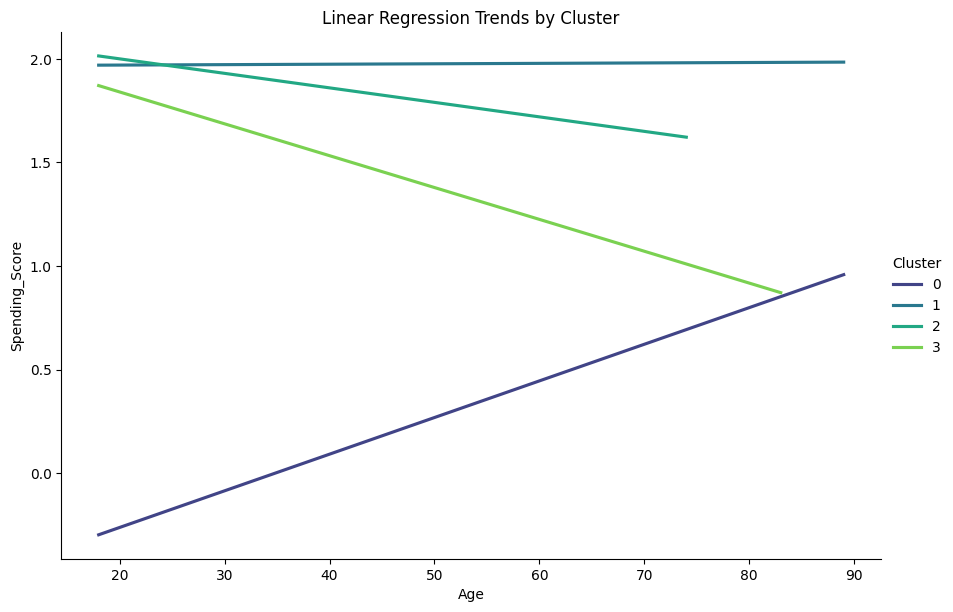

In [37]:
sns.lmplot(
    x='Age',
    y='Spending_Score',
    hue='Cluster',
    data=data,
    palette='viridis',
    height=6,
    aspect=1.5,
    lowess=False,  # Regular linear regression
    scatter=False,
    ci=None  # Remove confidence intervals for cleaner look
)
plt.title('Linear Regression Trends by Cluster')
plt.show()

In [40]:
data.to_csv("customer.csv", index=False)